Bayesian analysis of Poisson data with Poisson background (lstat)

An alternative approach to fitting Poisson data with background is to use Bayesian methods. In this case instead of solving for the background rate parameters we marginalize over them writing the joint probability distribution of the source parameters as :

$$
P=p\left(\left\{\theta_j\right\} \mid\left\{S_i\right\},\left\{B_i\right\}, I\right)=\int \ldots \int\left\{d b_k\right\} p\left(\left\{\theta_j\right\},\left\{b_k\right\} \mid\left\{S_i\right\},\left\{B_i\right\}, I\right)
$$

where $\{\theta_j\}$ are the source parameters, $\{b_k\}$ the background rate parameters and $I$ any prior information. Using Bayes theorem, that the $\{\theta_j\}$ and independent of the $\{b_k\}$, that the $\{b_k\}$ are individually independent and that the observed counts are Poisson gives :

$$
P=\frac{p\left(\left\{\theta_j\right\} \mid I\right)}{p\left(\left\{S_i\right\} \mid I\right) p\left(\left\{B_i\right\} \mid I\right)} \prod_{k=1}^N \frac{t_s^{S_k} t_b^{B_k} \mathrm{e}^{-m_k t_s}}{S_{k} ! B_{k} !} J_k
$$

where :

$$
J_k=\int d b_k p\left(b_k \mid I\right)\left(m_k+b_k\right)^{S_k} b_k^{B_k} \mathrm{e}^{-b_k\left(t_s+t_b\right)}
$$

To calculate $J_k$ we need to make an assumption about the prior background probability distribution, $p(b_k\vert I)$. We follow Loredo (1992) and assume a uniform prior between 0 and $b_i^{max}$. Expanding the binomial gives :

$$
J_k=\frac{1}{b_k^{\max }} \sum_{j=0}^{S_k} m_k^j \frac{S_{k} !}{j !\left(S_k-j\right) !} \frac{\gamma\left(S_k+B_k-j+1, b_k^{\max }\left(t_s+t_b\right)\right)}{\left(t_s+t_b\right)^{S_k+B_k-j+1}}
$$

where :

$$
\gamma(\alpha, \beta)=\int_0^\beta x^{(\alpha-1)} \mathrm{e}^{-x} d x
$$

Again, following Loredo we assume that  $(t_s+t_b)b_k^{max} >> B_k$ and using the approximation  $\gamma(\alpha,\beta) \sim (\alpha-1)!$ when  $\alpha >> \beta$ gives :

$$
J_k=\frac{S_{k} !\left(t_s+t_b\right)^{-\left(S_k+B_k+1\right)}}{b_k^{\max }} \sum_{j=0}^{S_k} m_k^j \frac{\left(S_k+B_k-j\right) !}{j !\left(S_k-j\right) !}\left(t_s+t_b\right)^j
$$

Note that for $m_k = 0$ only the $j = 0$ term in the summation is non-zero. Now, we define lstat by calculating $-2\ln{P}$ and ignoring all additive terms which are independent of the model parameters :

$$
\mathrm{lstat}=-2 \ln p\left(\left\{\theta_j\right\} \mid I\right)+2 \sum_{k=1}^N\left(m_k t_s-\ln \sum_{j=0}^{S_k} m_k^j \frac{\left(S_k+B_k-j\right) !}{j !\left(S_k-j\right) !}\left(t_s+t_b\right)^j\right)
$$

Original formula:
\begin{aligned}
& p\left(s \mid N_{\mathrm{on}} I\right)=\sum_{i=0}^{N_{\mathrm{on}}} C_i \frac{T_{\mathrm{on}}\left(s T_{\mathrm{on}}\right)^i e^{-s T_{\mathrm{on}}}}{i !} \\
& C_i=\frac{\left(1+\frac{T_{\mathrm{off}}}{T_{\mathrm{on}}}\right)^i \frac{\left(N_{\mathrm{on}}+N_{\mathrm{off}}-i\right) !}{\left(N_{\mathrm{on}}-i\right) !}}{\sum_{j=0}^{N_{\mathrm{on}}}\left(1+\frac{T_{\mathrm{off}}}{T_{\mathrm{on}}}\right)^j \frac{\left(N_{\mathrm{on}}+N_{\mathrm{off}}-j\right) !}{\left(N_{\mathrm{on}}-j\right) !}}
\end{aligned}

In [1]:
from scipy.special import poch
from lstat import lterm
def lstat_orig(n_on, n_off, t_on, t_off, rate_src):
    stat = 0.0
    t=t_on+t_off
    log_ton = np.log(t_on)

    for n in range(n_on.size):
        on = int(n_on[n])
        off = int(n_off[n])
        s = rate_src[n]
        
        i = np.arange(on + 1)
        j = np.arange(on + 1)
        #v1 = sum((1+t_off/t_on)**j * poch(on-j+1, off))
        tmp = [np.exp(lterm(on, off, ii)) for ii in i]
        lor_sum = np.sum((s*t)**i * tmp)# / v1)
        stat += np.log(lor_sum) - s*t_on + log_ton
    return -stat

In [2]:
from scipy.special import hyperu, hyp1f1, gamma
def lstat1_hyperu(n_on, n_off, t_on, t_off, rate_src):
    S = rate_src*t_on
    return sum(S-(1+n_on+n_off)*np.log(S) - np.log(hyperu(1+n_off,2+n_on+n_off,2*S)))
def lstat2_hyperu(n_on, n_off, t_on, t_off, rate_src):
    S = rate_src*t_on
    return sum(S-(n_on+n_off)*np.log(S) - np.log(hyperu(n_off,1+n_on+n_off,2*S)))

In [8]:
%timeit lstat(newS, newB, 1., 1., newdE*p[0])

39.2 µs ± 39.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
%timeit lstat_orig(newS, newB, 1., 1., newdE*p[0])

625 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


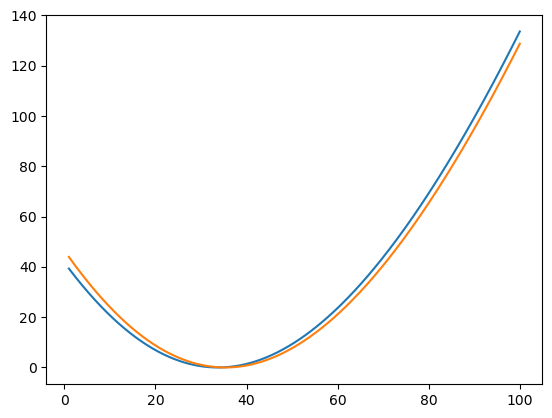

In [19]:
nbins=100
observation, background, dE = generate_data(nbins, 30, 50)
p=np.logspace(0, np.log10(100), 1000)
newS, newB, newdE = spec_rebin(observation, background, dE, rebin=25)
stat=[lstat(newS, newB, 1., 1., newdE*i)[0] for i in p]
plt.plot(p,np.array(stat)-min(stat))
# stat_orig=[lstat_orig(newS, newB, 1., 1., newdE*i) for i in p]
# plt.plot(p,np.array(stat_orig)-np.max(stat_orig))
stat2=[lstat2_hyperu(newS, newB, 1., 1., newdE*i) for i in p]
plt.plot(p,np.array(stat2)-min(stat2))
# plt.semilogy()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from lstat import lstat
@njit
def spec_rebin(S, B, dE, rebin=0.0):
    
        newS = np.zeros_like(S)
        newB = np.zeros_like(B)
        newdE = np.zeros_like(dE)

        m = 0
        j = 0
        k = 0

        for i, bi in enumerate(B):

            m += bi

            if i == len(B) - 1:

                if m >= rebin:

                    newS[k] = np.sum(S[j: i + 1])
                    newB[k] = np.sum(B[j: i + 1])
                    newdE[k] = np.sum(dE[j: i + 1])
                    
                    k += 1

                else:

                    # We reached the end but we don't have
                    # enough counts in the last bin. Let's
                    # incorporate these in the last bin
                    # of the rebinned one
                    newS[k - 1] += np.sum(S[j:])
                    newB[k - 1] += np.sum(B[j:])
                    newdE[k - 1] += np.sum(dE[j:])

                break

            if m >= rebin:
                newS[k] = np.sum(S[j: i + 1])
                newB[k] = np.sum(B[j: i + 1])
                newdE[k] = np.sum(dE[j: i + 1])

                m = 0
                j = i + 1
                k += 1

        assert np.sum(S) == np.sum(newS[:k]), "Sum of S is different"
        assert np.sum(B) == np.sum(newB[:k]), "Sum of B is different"
        assert abs(np.sum(newdE[:k]) - np.sum(dE)) < 0.01, "Sum of dE is different"
        assert np.all(newB[:k] >= rebin)
        
        return newS[:k], newB[:k], newdE[:k]

In [6]:
from scipy.optimize import minimize
def fit(obs, bkg, dE, x0, rebin=1.0):
    def _objective_function(par):
        _fit_eval(par)
        return __obj[0]

    def _jacobian(par):
        _fit_eval(par)
        return __jac[0]


    def _hessian(par):
        _fit_eval(par)
        return __hess[0]

    __par = [0.0]
    __obj = [None]
    __jac = [None]
    __hess = [None]
    
#     def _fit_eval(par):
#         if np.allclose(par, __par):
#             return None

#         obj, mu_bkg, jac, hess = wstat(newS, newB, 1, 1, np.exp(par) * newdE)

#         __par[0] = par
#         __obj[0] = obj
#         __jac[0] = (jac*np.exp(par)*newdE).sum()
#         __hess[0] = [(hess*np.exp(par)*newdE + jac*np.exp(par)*newdE).sum()]
    
#     newS, newB, newdE = spec_rebin(obs, bkg, dE, rebin=rebin)
#     x0 = np.log(x0)
#     results = minimize(_objective_function, x0=x0, method='bfgs', jac=_jacobian)

    def _fit_eval(par):
        if par == __par[0]:
            return None

        obj, jac, hess = lstat(newS, newB, 1, 1, par * newdE)

        __par[0] = par
        __obj[0] = obj
        __jac[0] = (jac*newdE).sum()
        __hess[0] = [(hess*newdE).sum()]
        # obj, jac, hess = lstat(newS, newB, 1, 1, np.exp(par) * newdE)

        # __par[0] = par
        # __obj[0] = obj
        # __jac[0] = (jac*np.exp(par)*newdE).sum()
        # __hess[0] = [(hess*np.exp(par)*newdE + jac*np.exp(par)*newdE).sum()]
    
    newS, newB, newdE = spec_rebin(obs, bkg, dE, rebin=rebin)
    # x0 = np.log(x0)
    results = minimize(_objective_function, x0=x0, method='BFGS', jac=_jacobian)
    # print('trust-exact')
    # results = minimize(_objective_function, x0=x0, method='trust-exact', jac=_jacobian, hess=_hessian)
    return results.x[0], np.sqrt(results.hess_inv[0,0]), results.jac[0]
def fit_debug(obs, bkg, dE, x0, rebin=1.0):
    def _objective_function(par):
        _fit_eval(par)
        print(__par[0][0], __obj[0], __jac[0], __hess[0][0], sep='\t\t')
        return __obj[0]

    def _jacobian(par):
        _fit_eval(par)
        return __jac[0]


    def _hessian(par):
        _fit_eval(par)
        return __hess[0]

    __par = [0.0]
    __obj = [None]
    __jac = [None]
    __hess = [None]
    
#     def _fit_eval(par):
#         if np.allclose(par, __par):
#             return None

#         obj, mu_bkg, jac, hess = wstat(newS, newB, 1, 1, np.exp(par) * newdE)

#         __par[0] = par
#         __obj[0] = obj
#         __jac[0] = (jac*np.exp(par)*newdE).sum()
#         __hess[0] = [(hess*np.exp(par)*newdE + jac*np.exp(par)*newdE).sum()]
    
#     newS, newB, newdE = spec_rebin(obs, bkg, dE, rebin=rebin)
#     x0 = np.log(x0)
#     results = minimize(_objective_function, x0=x0, method='bfgs', jac=_jacobian)

    def _fit_eval(par):
        if par == __par[0]:
            return None

#         obj, jac, hess = lstat(newS, newB, 1, 1, par * newdE)

#         __par[0] = par
#         __obj[0] = obj
#         __jac[0] = (jac*newdE).sum()
#         __hess[0] = [(hess*newdE).sum()]
        obj, jac, hess = lstat(newS, newB, 1, 1, np.exp(par) * newdE)

        __par[0] = par
        __obj[0] = obj
        __jac[0] = (jac*np.exp(par)*newdE).sum()
        __hess[0] = [(hess*np.exp(par)*newdE + jac*np.exp(par)*newdE).sum()]
    
    newS, newB, newdE = spec_rebin(obs, bkg, dE, rebin=rebin)
    x0 = np.log(x0)
    print('Nelder-Mead')
    results = minimize(_objective_function, x0=x0, method='Nelder-Mead', jac=_jacobian)
    print('Powell')
    results = minimize(_objective_function, x0=x0, method='Powell', jac=_jacobian)
    print('BFGS')
    results = minimize(_objective_function, x0=x0, method='BFGS', jac=_jacobian)
    print(results)
    # print('trust-exact')
    # results = minimize(_objective_function, x0=x0, method='trust-exact', jac=_jacobian, hess=_hessian)
    # print(results)
    return results.x[0], np.sqrt(results.hess_inv[0,0]), results.jac[0]

def generate_data(n_bins, src_rate, bkg_rate):
    dE = (10 - 1) / n_bins
    edges = np.linspace(1, 10, n_bins + 1)
    observation = np.random.poisson((src_rate + bkg_rate) * dE, n_bins)
    background = np.random.poisson(bkg_rate * dE, n_bins)

    return observation, background, np.diff(edges)

nbins=1600
src_rate=30
bkg_rate=50
fit_debug(*generate_data(nbins, src_rate, bkg_rate), src_rate, rebin=1)

Nelder-Mead
3.4011973816621555		92.06783386729963		24.768907667818766		91.14000796620056
3.5712572507452633		97.75745857587145		43.2693783855924		116.97214518022936
3.2311375125790476		89.00259429091359		12.111334500386608		71.15350192998176
3.0610776434959392		87.70711244892253		3.7244151845033677		55.71509776602832
2.720957905329723		88.13440823134692		-4.811750362638822		34.5680071806908
2.8910177744128314		87.56341498032829		-1.6106104572999957		43.79069090563645
2.7209579053297235		88.1344082313469		-4.811750362638817		34.568007180690834
2.9760477089543853		87.52225821168119		0.7391628685863727		49.36913504204239
3.0610776434959392		87.70711244892253		3.7244151845033677		55.71509776602832
2.9335327416836083		87.51788484424965		-0.5081699652711369		46.49018659730304
2.8910177744128314		87.56341498032829		-1.6106104572999957		43.79069090563645
2.954790225318997		87.51344425607589		0.09655211675601949		47.906482814959034
2.9760477089543853		87.52225821168119		0.7391628685863727		49.3

/Users/xuewc/miniconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:549: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
/Users/xuewc/miniconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:549: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


(2.9514821732810446, 0.18543344477011492, 3.2073193079185103e-07)

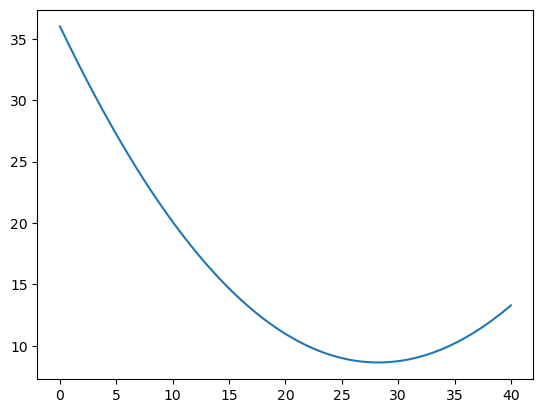

In [31]:
nbins=30
observation, background, dE = generate_data(nbins, 30, 50)
p=np.logspace(-3, np.log10(40), 1000)
newS, newB, newdE = spec_rebin(observation, background, dE, rebin=25)
stat=[lstat(newS, newB, 1., 1., newdE*i)[0] for i in p]
plt.plot(p,stat)
# plt.semilogy()

100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1420.60it/s]


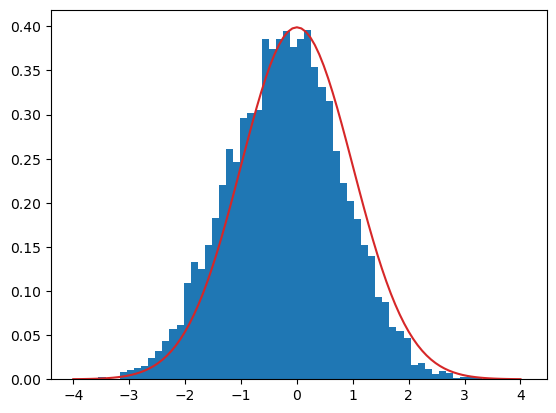

In [27]:
from tqdm import tqdm
from scipy.stats import norm
n=10000

src_rate = 30
bkg_rate = 50
nbins = 30
dE = (10 - 1) / nbins
edges = np.linspace(1, 10, nbins + 1)
observation = np.random.poisson((src_rate + bkg_rate) * dE, size=(n,nbins))
background = np.random.poisson(bkg_rate * dE, size=(n,nbins))
dE = np.diff(edges)
res = np.empty((n,3))
for i in tqdm(range(n)):
    res[i] = fit(observation[i], background[i], dE, src_rate, rebin=0)
_=plt.hist((res[:,0]-(src_rate))/res[:,1],bins='auto', density=True)
_=plt.plot(np.linspace(-4,4,101), norm.pdf(np.linspace(-4,4,101)),c='tab:red')

100%|██████████████████████████████████████| 5000/5000 [00:20<00:00, 243.23it/s]


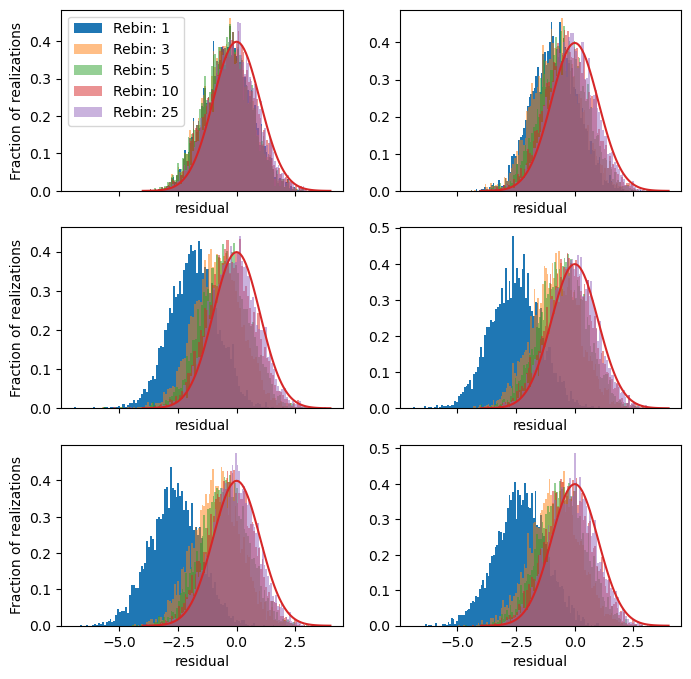

In [28]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm

fig, subs = plt.subplots(3,2, figsize=(8, 8), sharex=True)
number_of_bins = [50, 100, 200, 400, 500, 1600]
for i, (sub, n_bins) in enumerate(zip(subs.flatten(), 
                                      number_of_bins)):
    
    n=5000

    src_rate = 30
    bkg_rate = 50
    dE = (10 - 1) / n_bins
    edges = np.linspace(1, 10, n_bins + 1)
    observation = np.random.poisson((src_rate + bkg_rate) * dE, size=(n,n_bins))
    background = np.random.poisson(bkg_rate * dE, size=(n,n_bins))
    dE = np.diff(edges)
    res1 = np.empty((n,3))
    res3 = np.empty((n,3))
    res5 = np.empty((n,3))
    res10 = np.empty((n,3))
    res25 = np.empty((n,3))
    for ni in tqdm(range(n)):
        res1[ni] = fit(observation[ni], background[ni], dE, src_rate, rebin=1)
        res3[ni] = fit(observation[ni], background[ni], dE, src_rate, rebin=3)
        res5[ni] = fit(observation[ni], background[ni], dE, src_rate, rebin=5)
        res10[ni] = fit(observation[ni], background[ni], dE, src_rate, rebin=10)
        res25[ni] = fit(observation[ni], background[ni], dE, src_rate, rebin=25)
        
    _ = sub.hist((res1[:,0]-src_rate)/res1[:,1], 'auto', label='Rebin: 1', density=True)
    _ = sub.hist((res3[:,0]-src_rate)/res3[:,1], 'auto', label='Rebin: 3', alpha=0.5, density=True)
    _ = sub.hist((res5[:,0]-src_rate)/res5[:,1], 'auto', label='Rebin: 5', alpha=0.5, density=True)
    _ = sub.hist((res10[:,0]-src_rate)/res10[:,1], 'auto', label='Rebin: 10', alpha=0.5, density=True)
    _ = sub.hist((res25[:,0]-src_rate)/res25[:,1], 'auto', label='Rebin: 25', alpha=0.5, density=True)
    sub.plot(np.linspace(-4,4,101), norm.pdf(np.linspace(-4,4,101)),c='tab:red')
        
    sub.set_xlabel("residual")
    
    if (i+1) % 2 != 0:
        
        sub.set_ylabel("Fraction of realizations")


_ = subs[0][0].legend(loc=0)